In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#Dataset

In [3]:
df = pd.read_csv('COVID Data.csv')

In [4]:
df.shape

(5331, 5)

#Preprocessing

In [5]:
df.isnull().sum()

Date Administered                   0
AgeGroupVacc                        0
7-day_avg_group_cases_per_100k      0
Administered_Dose1_pct_agegroup     0
Series_Complete_Pop_pct_agegroup    0
dtype: int64

In [6]:
df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032


In [7]:
print("Average Cases: ", df['7-day_avg_group_cases_per_100k'].mean())
print("Minimum Cases: ", df['7-day_avg_group_cases_per_100k'].min())
print("Maximum Cases: ", df['7-day_avg_group_cases_per_100k'].max())

Average Cases:  30.625570325845523
Minimum Cases:  1.62491137761832
Maximum Cases:  300.7184049961944


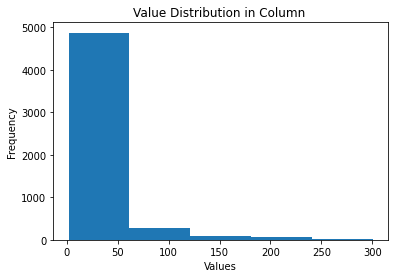

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['7-day_avg_group_cases_per_100k'], bins=5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Value Distribution in Column ')
plt.show()

In [9]:
df[df['7-day_avg_group_cases_per_100k']>299].head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup
2199,01/09/2022 12:00:00 AM,18 - 24 Years,300.718405,0.736,0.609
2207,01/08/2022 12:00:00 AM,18 - 24 Years,300.609676,0.736,0.608


In [10]:
df_filtered = df[(df['Administered_Dose1_pct_agegroup'] == 0) & (df['Series_Complete_Pop_pct_agegroup'] == 0)]

df_filtered.shape

(1299, 5)

In [11]:
df[df['Series_Complete_Pop_pct_agegroup'] >= 0.7].shape

(1142, 5)

In [12]:
print(df['AgeGroupVacc'].value_counts())
print("_____________________________")
print(len(df['AgeGroupVacc'].unique()))

<2 Years         667
12 - 17 Years    667
25 - 49 Years    667
2 - 4 Years      666
5 - 11 Years     666
18 - 24 Years    666
50 - 64 Years    666
65+ Years        666
Name: AgeGroupVacc, dtype: int64
_____________________________
8


In [13]:
df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032


In [14]:
df.isnull().sum()

Date Administered                   0
AgeGroupVacc                        0
7-day_avg_group_cases_per_100k      0
Administered_Dose1_pct_agegroup     0
Series_Complete_Pop_pct_agegroup    0
dtype: int64

#Feature Selection

##Correlation Matrix

In [15]:
corr_matrix = df.corr()

print(corr_matrix)

                                  7-day_avg_group_cases_per_100k  \
7-day_avg_group_cases_per_100k                          1.000000   
Administered_Dose1_pct_agegroup                         0.068510   
Series_Complete_Pop_pct_agegroup                        0.062031   

                                  Administered_Dose1_pct_agegroup  \
7-day_avg_group_cases_per_100k                           0.068510   
Administered_Dose1_pct_agegroup                          1.000000   
Series_Complete_Pop_pct_agegroup                         0.992843   

                                  Series_Complete_Pop_pct_agegroup  
7-day_avg_group_cases_per_100k                            0.062031  
Administered_Dose1_pct_agegroup                           0.992843  
Series_Complete_Pop_pct_agegroup                          1.000000  


<AxesSubplot:>

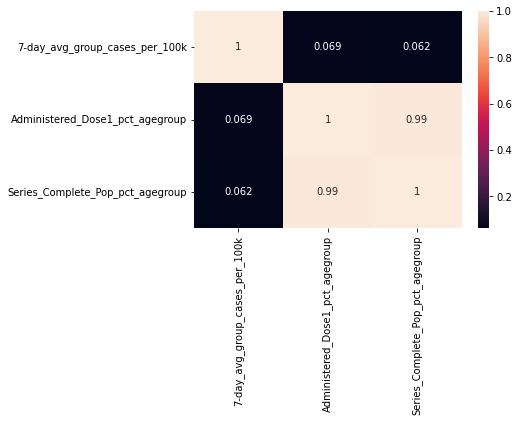

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

##Importance

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the model
rf = RandomForestRegressor()

# Fit the model on the data
rf.fit(df[['Series_Complete_Pop_pct_agegroup']], df['7-day_avg_group_cases_per_100k'])

# Get the feature importance that column
importance = rf.feature_importances_

print("Importance of series column: ", importance)

Importance of series column:  [1.]



##Target Variable

In [18]:
df = df[df['Series_Complete_Pop_pct_agegroup'] != 0]

df.shape

(3844, 5)

In [19]:
df['Immunity'] = (df["7-day_avg_group_cases_per_100k"] < 100) & (df['Series_Complete_Pop_pct_agegroup'] > 0.65)

df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Immunity
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017,False
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608,False
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710,True
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017,False
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032,False


In [20]:
df['Immunity'].value_counts()

one = (df["Immunity"].value_counts()[1].sum()/df["Immunity"].value_counts()[0].sum()) * 100

print(f"Percentage of values which are one: {round(one, 2)}")

Percentage of values which are one: 53.76


In [21]:
df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Immunity
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017,False
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608,False
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710,True
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017,False
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032,False


In [22]:
f = lambda x: 1 if x==True else 0

df['Immunity'] = df[['Immunity']].applymap(f)

df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Immunity
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017,0
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608,0
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710,1
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017,0
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032,0


In [23]:
one = df[df['Immunity'] == 1]

zero = df[df['Immunity'] == 0]

In [24]:
zero.shape

(2500, 6)

In [25]:
one.shape

(1344, 6)

In [26]:
one = df[df['Immunity'] == 1]

zero = df[df['Immunity'] == 0]

zero = zero.iloc[800:]

final_df = pd.concat([one, zero], ignore_index=True)

df  = final_df.drop("Date Administered", axis=1)

##Immunity Charts

<AxesSubplot:ylabel='Immunity'>

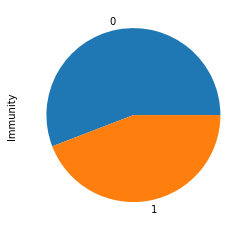

In [27]:
Immunity = df['Immunity'].value_counts()

Immunity.plot(kind='pie')

In [28]:
df[df['Immunity']==1].shape[0] + df[df['Immunity']==0].shape[0]

3044

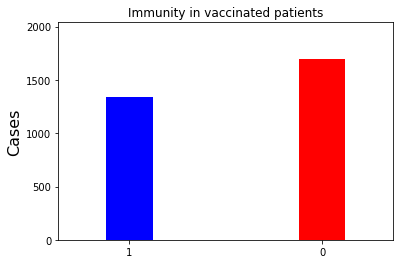

In [29]:
# data
names = ['1', '0']
values = [df[df['Immunity']==1].shape[0], df[df['Immunity']==0].shape[0]]

# create bar chart
fig, ax = plt.subplots()
ax.bar(names, values, color=['blue', 'red'], width=0.24)

# set chart title and axis labels
ax.set_title('Immunity in vaccinated patients')
ax.set_ylabel('Cases', fontsize = 16)

# Set Margins
plt.margins(x=0.2, y=0.2)


# Hide grid lines
# plt.grid(False)

# Hide axes ticks
plt.yticks([0, 500, 1000, 1500, 2000])


# show chart
plt.show()

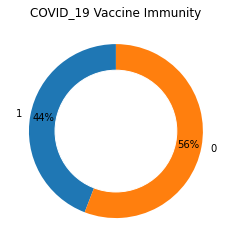

In [30]:
# data
labels = ['1', '0']
sizes = [df[df['Immunity']==1].shape[0], df[df['Immunity']==0].shape[0]]

# create donut chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85)

# create white circle in the center to make a donut chart
circle = plt.Circle((0,0), 0.7, color='white')
fig.gca().add_artist(circle)

# set chart title
ax.set_title('COVID_19 Vaccine Immunity')

# show chart
plt.show()

In [31]:
df['AgeGroupVacc'].unique()

array(['25 - 49 Years', '18 - 24 Years', '50 - 64 Years', '65+ Years',
       '5 - 11 Years', '12 - 17 Years'], dtype=object)

In [32]:
# Group by age_group and binary_value columns and count
counts = df.groupby(['AgeGroupVacc', 'Immunity']).size().unstack()

# desired order of the rows
desired_order = ["5 - 11 Years", "12 - 17 Years", "18 - 24 Years", "25 - 49 Years", "50 - 64 Years", "65+ Years"]

# reindex the dataframe with the desired order of rows
counts = counts.reindex(index=desired_order)

In [33]:
counts

Immunity,0,1
AgeGroupVacc,,
5 - 11 Years,264.0,NaN
12 - 17 Years,378.0,NaN
18 - 24 Years,413.0,56.0
25 - 49 Years,353.0,292.0
50 - 64 Years,188.0,457.0
65+ Years,104.0,539.0


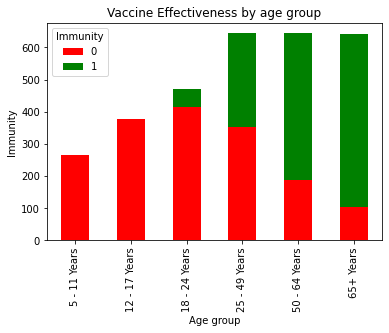

In [34]:
# Plot bar chart
counts.plot(kind='bar', stacked=True, color=['red', 'green'])

# Add title and axis labels
plt.title('Vaccine Effectiveness by age group')
plt.xlabel('Age group')
plt.ylabel('Immunity')

# Show plot
plt.show()

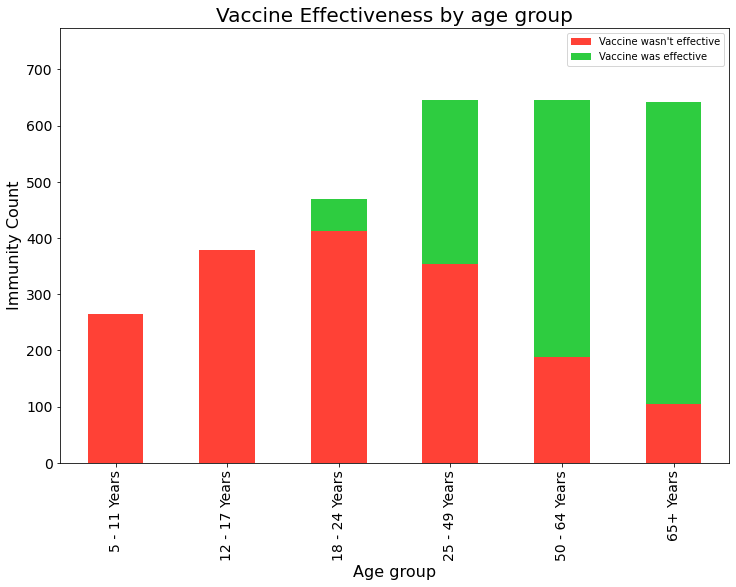

In [35]:
# Set the color palette
colors = ['#FF4136', '#2ECC40']

# Create the bar chart
ax = counts.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))

# Set the title and axis labels
plt.title('Vaccine Effectiveness by age group', fontsize=20)
plt.xlabel('Age group', fontsize=16)
plt.ylabel('Immunity Count', fontsize=16)

# Set Margins
plt.margins(x=0.2, y=0.2)

# Set the font size for the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the legend
ax.legend(["Vaccine wasn't effective", 'Vaccine was effective'])

# Add eye-catching patterns to the bars
# hatches = ['/', '.', "-"]
# for i, patch in enumerate(ax.patches):
#     patch.set_hatch(hatches[i % len(hatches)])

# Show the plot
plt.show()


#Machine Learning Techniques

##Data Preprocessing for Algorithms

In [36]:
print(df['AgeGroupVacc'].value_counts())
print("_____________________________")
print(len(df['AgeGroupVacc'].unique()))

25 - 49 Years    645
50 - 64 Years    645
65+ Years        643
18 - 24 Years    469
12 - 17 Years    378
5 - 11 Years     264
Name: AgeGroupVacc, dtype: int64
_____________________________
6


In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['AgeGroupVacc'] = le.fit_transform(df.AgeGroupVacc.values)

In [38]:
df.head()

,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Immunity
0,2,4.375377,0.840,0.710,1
1,1,4.940567,0.805,0.655,1
2,2,5.533741,0.840,0.710,1
3,4,4.938932,0.946,0.827,1
4,5,6.052993,0.950,0.928,1


##Support Vector machine

In [39]:
#Seperating features and labels
X = df.iloc[:, :4].values
y = df.iloc[:, -1].values


# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
# clf = svm.SVC(kernel='rbf', C=10, gamma=0.001)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

SVM_acc = metrics.accuracy_score(y_test, y_pred)*100
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", SVM_acc)

Accuracy: 96.97766097240473


In [42]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       429
           1       0.95      0.98      0.97       332

    accuracy                           0.97       761
   macro avg       0.97      0.97      0.97       761
weighted avg       0.97      0.97      0.97       761



In [43]:
from sklearn.metrics import f1_score

SVM_f1 = f1_score(y_test, y_pred)*100

SVM_f1

96.5925925925926

##Logistics Regression/Linear Classification

In [44]:
#Seperating features and labels
X = df.iloc[:, :4].values
y = df.iloc[:, -1].values


# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
# from sklearn.linear_model import LogisticRegression

# log_Regressor = LogisticRegression()
# log_Regressor.fit(X_train , y_train)

In [46]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters to tune
# hyperparameters = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10, 100]
# }

# # Create a logistic regression model
# log_Regressor = LogisticRegression()

# # Use GridSearchCV to tune the hyperparameters
# grid_search = GridSearchCV(log_Regressor, hyperparameters, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print('Best Penalty:', grid_search.best_estimator_.get_params()['penalty'])
# print('Best C:', grid_search.best_estimator_.get_params()['C'])

# # Use the best hyperparameters to create a new logistic regression model
# log_Regressor = LogisticRegression(penalty=grid_search.best_estimator_.get_params()['penalty'],
#                                     C=grid_search.best_estimator_.get_params()['C'])
# log_Regressor.fit(X_train, y_train)

In [47]:
# # Evaluate the accuracy of the model
# LR_acc = log_Regressor.score(X_test, y_test)*100
# print('Accuracy:', LR_acc)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

LR_acc = metrics.accuracy_score(y_test, y_pred)*100
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", LR_acc)

Accuracy: 48.75164257555847


In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       418
           1       0.43      0.43      0.43       343

    accuracy                           0.49       761
   macro avg       0.48      0.48      0.48       761
weighted avg       0.49      0.49      0.49       761



In [49]:
from sklearn.metrics import f1_score

LR_f1 = f1_score(y_test, y_pred)*100

LR_f1

43.14868804664723

##Gaussian Naive Bayes

In [50]:
#Seperating features and labels
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values


# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
gnb_y_pred = gnb.predict(X_test)

NB_acc = metrics.accuracy_score(y_test, gnb_y_pred)*100
# Accuracy of the model
print("ACCURACY OF THE MODEL: ", NB_acc)

ACCURACY OF THE MODEL:  78.18659658344284


In [52]:
print(metrics.classification_report(y_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       414
           1       0.78      0.73      0.75       347

    accuracy                           0.78       761
   macro avg       0.78      0.78      0.78       761
weighted avg       0.78      0.78      0.78       761



In [53]:
from sklearn.metrics import f1_score

GNB_f1 = f1_score(y_test, gnb_y_pred)*100

GNB_f1

75.37091988130562

##XG Boost

In [54]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import xgboost as xgb

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [56]:
# model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5, colsample_bytree=0.5, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [57]:
expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       411
           1       0.77      0.77      0.77       350

    accuracy                           0.79       761
   macro avg       0.79      0.79      0.79       761
weighted avg       0.79      0.79      0.79       761



In [58]:
XG_acc = metrics.accuracy_score(expected_y, predicted_y)*100

print("ACCURACY OF THE MODEL: ", XG_acc)

ACCURACY OF THE MODEL:  78.84362680683311


In [59]:
from sklearn.metrics import f1_score

XG_f1 = f1_score(expected_y, predicted_y)*100

XG_f1

76.96709585121603

##Random Forest

In [60]:
#Seperating features and labels
X = df.iloc[:, :4].values
y = df.iloc[:, -1].values

# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [61]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier


# creating a RF classifier
# clf = RandomForestClassifier(n_estimators = 1, min_samples_split=850, min_samples_leaf=700, max_depth=1) 
clf = RandomForestClassifier() 

# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics 
print()

RF_acc = metrics.accuracy_score(y_test, y_pred)*100
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", RF_acc)


ACCURACY OF THE MODEL:  99.73718791064388


In [62]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       426
           1       0.99      1.00      1.00       335

    accuracy                           1.00       761
   macro avg       1.00      1.00      1.00       761
weighted avg       1.00      1.00      1.00       761



In [63]:
RF_f1 = f1_score(expected_y, predicted_y)*100

RF_f1

76.96709585121603

##Plotting Results of all algorithms

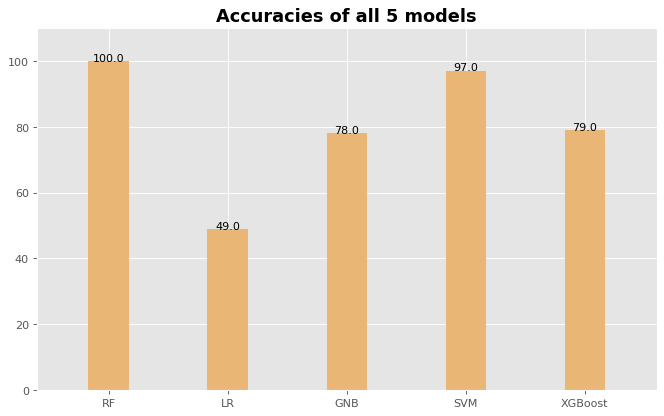

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(10,6), dpi=80)

# Create an array of 5 values
data = np.round(np.array([RF_acc, LR_acc, NB_acc, SVM_acc, XG_acc]))

# Specify the x-axis labels
labels = ['RF', 'LR', 'GNB', 'SVM', 'XGBoost']

# Colors
colors = ['#eab676']

# Create the histogram plot
plt.bar(labels, data, color=colors, width=0.34)

# Add values to each bar
for i, v in enumerate(data):
    plt.text(i, v, str(v), color='black', ha='center')

# Add title and labels
plt.title("Accuracies of all 5 models", size=16, fontweight="bold")

# Set Margins
plt.margins(x=0.1, y=0.1)

# Hide grid lines
# plt.grid(False)

# Hide axes ticks
# plt.xticks([])
plt.yticks([0, 20, 40, 60, 80, 100])

# Show the plot
plt.show()


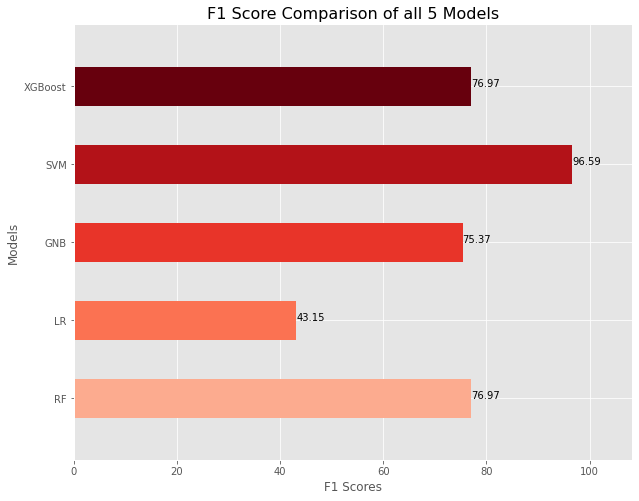

In [65]:
# Create a list of model names and their F1 scores
model_names = ['RF', 'LR', 'GNB', 'SVM', 'XGBoost']
f1_scores = [RF_f1, LR_f1, GNB_f1, SVM_f1, XG_f1]

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))

# Define gradient color
colors = plt.cm.Reds(np.linspace(0.3, 1, len(model_names)))

# Add f1 score labels on bars
for i, v in enumerate(f1_scores):
    ax.text(v + 0.01, i, str(round(v, 2)), color='black')

# Plot Horizontal bar
ax.barh(model_names, f1_scores, align='center', color=colors, height=0.5)

# Add axis labels and title
ax.set_xlabel('F1 Scores')
ax.set_ylabel('Models')
ax.set_title('F1 Score Comparison of all 5 Models', size=16)

# Set Margins
ax.margins(x=0.12, y=0.12)

# Set x-axis limits and tick labels
ax.tick_params(axis='x', labelsize=10)

# Hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

<Figure size 432x288 with 0 Axes>

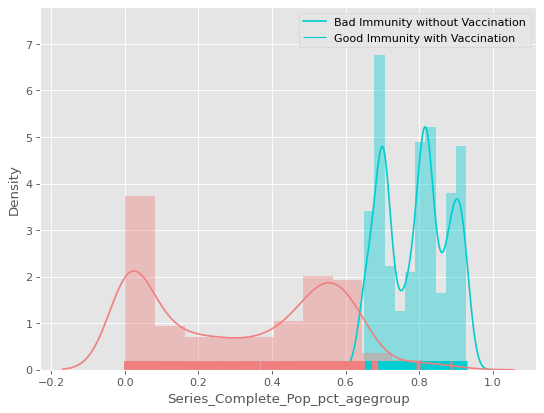

In [66]:
plt.figure()
figure(figsize=(8,6), dpi=80)
ax = sns.distplot(df['Series_Complete_Pop_pct_agegroup'][df.Immunity == 1], color = 'darkturquoise', rug=True)
sns.distplot(df['Series_Complete_Pop_pct_agegroup'][df.Immunity == 0], color = 'lightcoral', rug=True)
plt.legend(['Bad Immunity without Vaccination', "Good Immunity with Vaccination"])

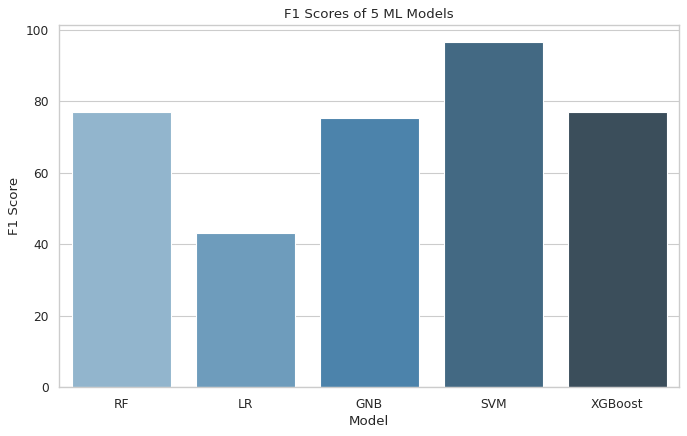

In [67]:
import seaborn as sns

figure(figsize=(10,6), dpi=80)

model_names = ['RF', 'LR', 'GNB', 'SVM', 'XGBoost']
f1_scores = [RF_f1, LR_f1, GNB_f1, SVM_f1, XG_f1]

# Create a dictionary to store the data
data = {'Model': model_names, 'F1 Score': f1_scores}

# Convert data to pandas dataframe
df = pd.DataFrame(data)

# Create a bar plot using seaborn
sns.set(style="whitegrid")
sns.barplot(x="Model", y="F1 Score", data=df, color="salmon", palette="Blues_d", saturation=0.7)

# Add title and axis labels
plt.title('F1 Scores of 5 ML Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')

# Show plot
plt.show()